In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Read CSV
df = pd.read_csv("medical_clean.csv")

In [3]:
# Get profile of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# Check for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
# Remove irrelevant variables
df = df.drop(columns=[
    'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
    'Zip', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Marital', 'Gender', 'ReAdmis', 
    'Doc_visits', 'Full_meals_eaten', 'vitD_supp',  'Soft_drink', 'Initial_admin','HighBlood', 
    'Stroke', 'Complication_risk', 'Overweight', 'Arthritis','Diabetes', 'Hyperlipidemia', 
    'BackPain', 'Anxiety',  'Allergic_rhinitis','Reflux_esophagitis', 'Asthma', 'Services', 
    'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'
])

In [7]:
# Recheck data profile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Initial_days        10000 non-null  float64
 5   TotalCharge         10000 non-null  float64
 6   Additional_charges  10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [8]:
# Use Standard Scaler to standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns = df.columns)
scaled_data.head()

,Lat,Lng,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
0,-0.814668,0.297134,1.615914,0.583603,-0.907310,-0.727185,0.765005
1,-1.463305,0.395522,0.221443,0.483901,-0.734595,-0.513228,0.715114
2,0.886966,-0.354788,-0.915870,0.046227,-1.128292,-1.319983,0.698635
3,0.952530,-0.149403,-0.026263,-0.687811,-1.244503,-1.460517,0.009004
4,-0.213252,0.943984,-1.377325,-0.260366,-1.261991,-1.467285,-1.408991


In [9]:
# Extract new dataset
scaled_data.to_csv("D212_scaled_task1.csv")

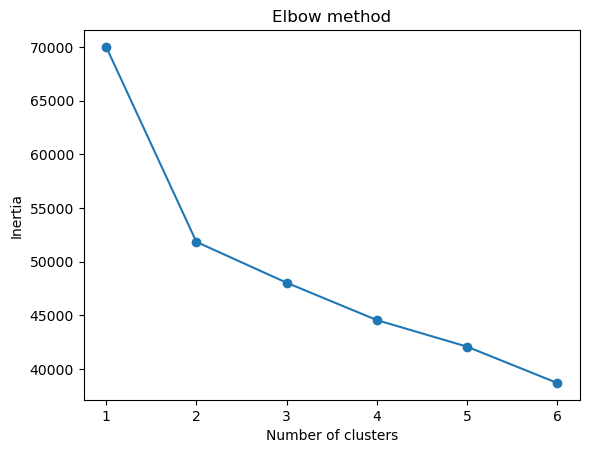

In [10]:
# Adapted from: W3Schools. (n.d.). Python Machine Learning - K-means.
# https://www.w3schools.com/python/python_ml_k-means.asp

inertias = []

for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,7), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,7))
plt.show()

For n_clusters = 2, the silhouette score is 0.26365098313790236
For n_clusters = 3, the silhouette score is 0.24284144850232192
For n_clusters = 4, the silhouette score is 0.20443764852486979
For n_clusters = 5, the silhouette score is 0.21557420670471683
For n_clusters = 6, the silhouette score is 0.177797059948818


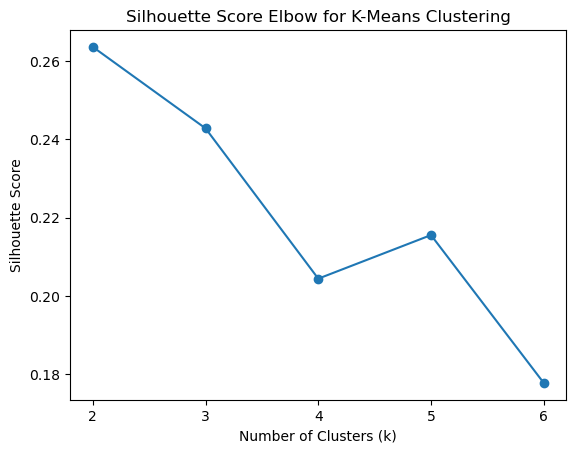

In [11]:
# Find silhouette scores

ks = range(2, 7)
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    sil_score = silhouette_score(scaled_data, labels)
    sil_scores.append(sil_score)
    print(f"For n_clusters = {k}, the silhouette score is {sil_score}")

# Plot the Silhouette Score Elbow
plt.plot(ks, sil_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Elbow for K-Means Clustering')
plt.xticks(ks)
plt.show()

In [12]:
# Adapted from: W3Schools. (n.d.). Python Machine Learning - K-means.
# https://www.w3schools.com/python/python_ml_k-means.asp

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
print(labels)

[0 0 0 ... 1 1 1]


In [13]:
# Get cluster centers
kmeans.cluster_centers_

array([[ 0.00120672,  0.01197978,  0.00885118,  0.00635398, -0.95865647,
        -0.94687406, -0.00623197],
       [-0.00120721, -0.01198458, -0.00885472, -0.00635652,  0.95904001,
         0.94725289,  0.00623446]])

In [14]:
# Run PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

In [15]:
# Source: GeeksforGeeks. (2021, November 15). KMeans Clustering and PCA on Wine Dataset.
# https://www.geeksforgeeks.org/machine-learning/kmeans-clustering-and-pca-on-wine-dataset/


# Reduce clusters using PCA
centers = pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-1.34706439, -0.00711865],
       [ 1.34760333,  0.0071215 ]])

In [16]:
# Shows how each original feature contributes to PC1 and PC2
pd.DataFrame(pca.components_, columns=scaled_data.columns, index=['PC1', 'PC2'])

,Lat,Lng,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
PC1,-0.012385,-0.011393,-0.019039,-0.003094,0.706503,0.706831,0.024252
PC2,0.707635,-0.698869,-0.086107,0.058388,0.000265,-0.001082,-0.003272


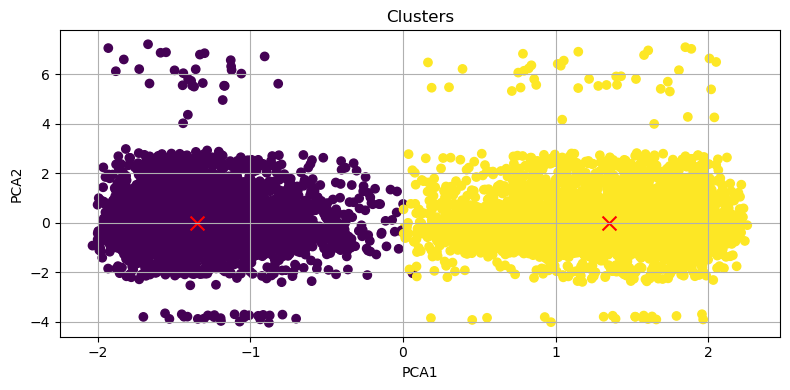

In [17]:
# Source: GeeksforGeeks. (2021, November 15). KMeans Clustering and PCA on Wine Dataset.
# https://www.geeksforgeeks.org/machine-learning/kmeans-clustering-and-pca-on-wine-dataset/

plt.figure(figsize=(8, 4))

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans.labels_,  cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters')
plt.grid(True)
plt.tight_layout()

In [18]:
# Source: Cervantes, A. (n.d.). Interpreting and validating clustering results with K-means.
# https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d


# Validate clustering results

# Silhouette score
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Davies-Bouldin score
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")

# WCSS
wcss = kmeans.inertia_
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")

Silhouette Score: 0.26365098313790236
Davies-Bouldin Index: 1.5792154347299237
Within-Cluster Sum of Squares (WCSS): 51833.782601330204
